In [1]:
import sys
import os
sys.path.insert(0, os.path.join(os.getcwd(), '../core'))
import kaggle_support as kgs
import importlib
import matplotlib.pyplot as plt
import numpy as np
import cupy as cp
from dataclasses import dataclass, field, fields
import pack_cuda
import pack_vis
import pack_cost
import copy
import time
import pack_ga
from IPython.display import HTML, display, clear_output
pack_cuda.USE_FLOAT32 = False
pack_cuda._ensure_initialized()


local
local
stop final relax at some point


stop final relax at some point


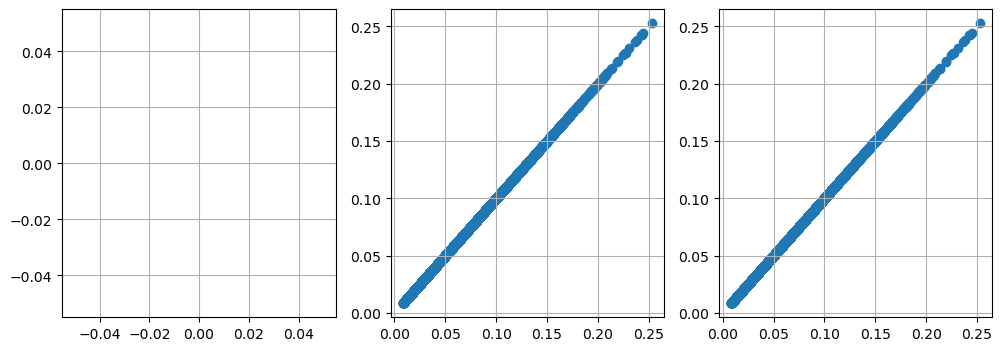

Generation 0, Trees 2, Best cost: 0.00842955, Est: 0.42147750, h: 0.918126
[[0.9181258 0.9181258 1.5707964]]


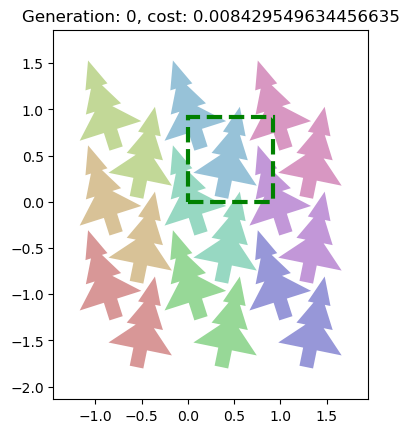

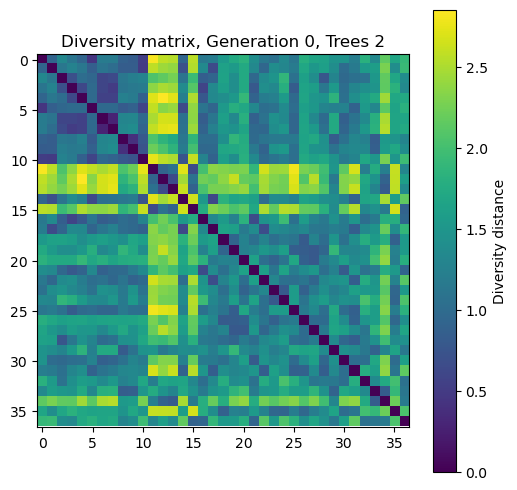

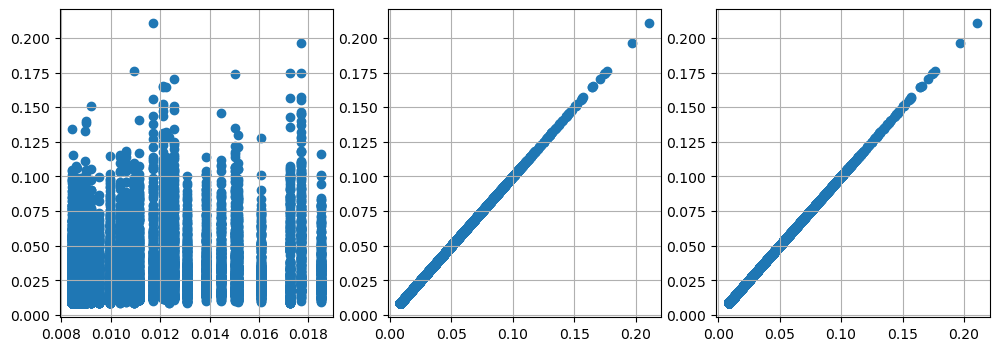

Generation 1, Trees 2, Best cost: 0.00842955, Est: 0.42147750, h: 0.918126
[[0.9181258 0.9181258 1.5707964]]


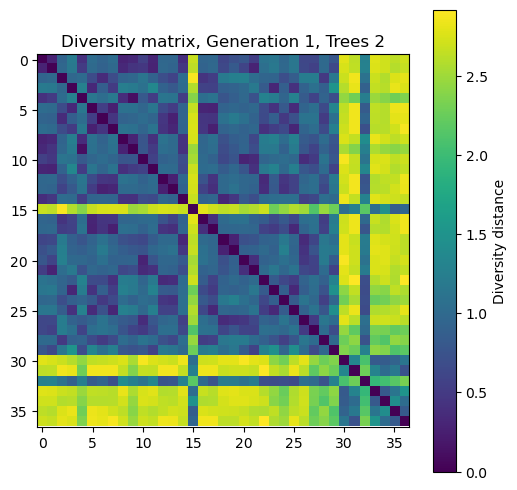

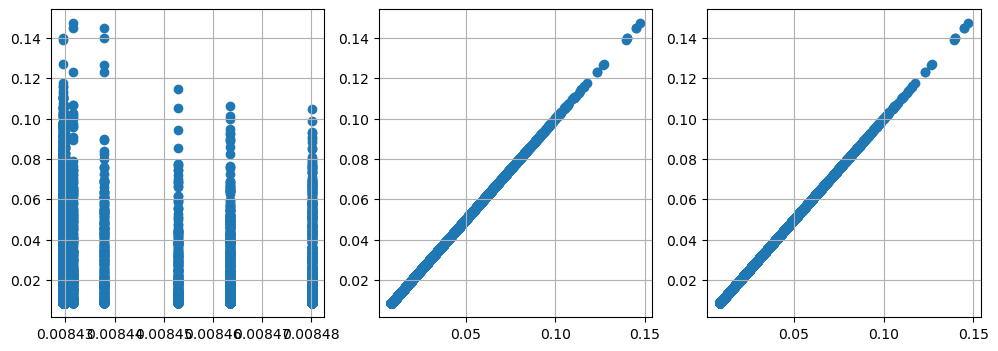

Generation 2, Trees 2, Best cost: 0.00842955, Est: 0.42147750, h: 0.918126
[[0.9181258 0.9181258 1.5707964]]


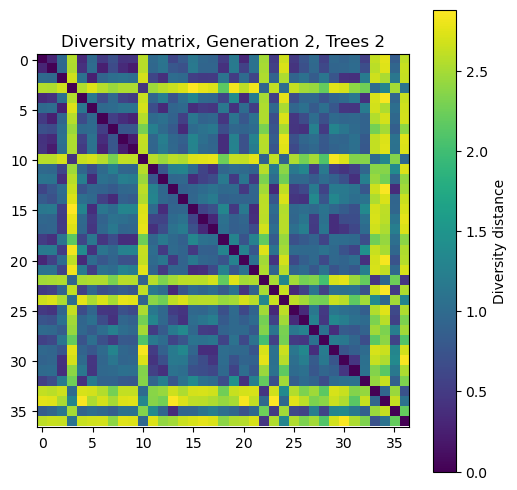

In [ ]:
importlib.reload(pack_ga)
fastMode = False
runner = pack_ga.GA()

# fast for now
#runner.population_size = 1
#runner.selection_size = [0]
#runner.n_generations = 500

# structural
runner.N_trees_to_do = np.array([2])
runner.population_size = 10000
runner.plot_fitness_predictors = True
runner.plot_diversity_matrix = True
runner.initializer.base_solution = kgs.SolutionCollectionLattice()
runner.initializer.jiggler.duration_init = 0.
runner.initializer.jiggler.duration_compact /= 100000
runner.initializer.jiggler.duration_final = 0.
runner.initializer.jiggler.plot_interval = None
runner.initializer.jiggler.n_rounds = 1
runner.rough_relaxers[0].plot_interval =None
runner.rough_relaxers[0].n_iterations//=5
runner.fine_relaxers[0].plot_interval=None
runner.rough_relaxers[0].cost.costs.pop(1)
runner.fine_relaxers[0].cost.costs.pop(1)
runner.fine_relaxers[0].n_iterations//=5
runner.fitness_cost.costs.pop(1)
kgs.debugging_mode = 1
kgs.profiling=False
new_moves = []
for i in [1,2,3,4,5]:
    new_moves.append(runner.move.moves[i])
runner.move.moves = new_moves
#runner.rough_relaxers = []
#runner.fine_relaxers = []
runner.run()

In [ ]:
runner.rough_relaxers[0].cost

CostCompound(comment='', scaling=1.0, costs=[AreaCost(comment='', scaling=0.01), CollisionCostOverlappingArea(comment='', scaling=1.0)])